In [255]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\Drl\\Desktop\\sample.csv")
print(data.info())

data_f = data.drop(["DocID","SetID","GenericName","NDCCode","FormCode","FormName","IngredientStatus","IngredientCode","Dose","unit","MoietyName","MoietyCode","SPECIFICATION"],axis=1)
#print(data_f.head(5))
X = list(data_f["NDCName"])
print(X)

Y = list(data_f["SubstanceName"])
print(Y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
DocID               100 non-null object
SetID               100 non-null object
NDCCode             100 non-null object
NDCName             100 non-null object
GenericName         0 non-null float64
FormCode            0 non-null float64
FormName            0 non-null float64
IngredientStatus    100 non-null object
IngredientCode      100 non-null object
SubstanceName       100 non-null object
Dose                0 non-null float64
unit                100 non-null object
MoietyName          0 non-null float64
MoietyCode          0 non-null float64
SPECIFICATION       100 non-null object
dtypes: float64(6), object(9)
memory usage: 11.8+ KB
None
['BodycologyExotic Cherry Kit\n                        ', 'BodycologyExotic Cherry Kit\n                        ', 'BodycologyExotic Cherry Kit\n                        ', 'BodycologyExotic Cherry Kit\n                        ', 'BodycologyExot

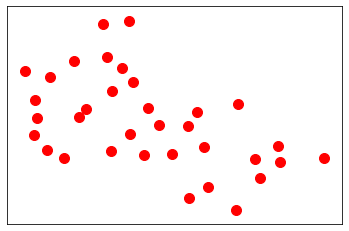

In [320]:
pos=nx.spring_layout(G)

ndc = [node for node in G.nodes() if node in data_f['NDCName'].unique()]
nx.draw_networkx_nodes(G,pos, node_list = ndc, node_color = 'r',node_size = 100)


# to get he substance size *80 to get the variable size                       
substances = [node for node in G.nodes() if node in data_f['SubstanceName'].unique()]
#substance_size = [G.degree(substance)*200 for substance in substances ]
nx.draw_networkx_nodes(G,pos, nodelist = substances, node_size = 10, node_color = 'b')

ColumnDataSource(id='73434', ...)
ColumnDataSource(id='73435', ...)
ColumnDataSource(id='75053', ...)
[('BodycologyExotic Cherry Kit\n                        ', 'WATER'), ('BodycologyExotic Cherry Kit\n                        ', 'SODIUM LAURETH SULFATE'), ('BodycologyExotic Cherry Kit\n                        ', 'COCAMIDOPROPYL BETAINE'), ('BodycologyExotic Cherry Kit\n                        ', 'ALOE VERA LEAF'), ('BodycologyExotic Cherry Kit\n                        ', 'HONEY'), ('BodycologyExotic Cherry Kit\n                        ', 'GLYCOL DISTEARATE'), ('BodycologyExotic Cherry Kit\n                        ', 'COCO MONOETHANOLAMIDE'), ('BodycologyExotic Cherry Kit\n                        ', 'LAURETH-10'), ('BodycologyExotic Cherry Kit\n                        ', 'SODIUM CHLORIDE'), ('BodycologyExotic Cherry Kit\n                        ', 'EDETATE DISODIUM'), ('BodycologyExotic Cherry Kit\n                        ', 'SULISOBENZONE'), ('BodycologyExotic Cherry Kit\n             

ColumnDataSource(id='73434', ...)

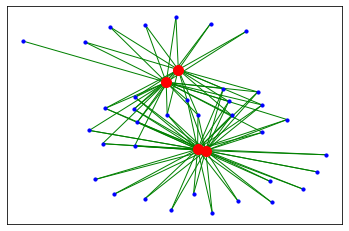

In [335]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx,NodesAndLinkedEdges
from bokeh.palettes import Spectral4
from bokeh.models.sources import ColumnDataSource, CDSView

# Prepare Data
'''filelocation = r"C:\\Users\\Drl\\Desktop\\sample.csv"

Panda_edgelist = pd.read_csv(filelocation)'''

g = nx.from_pandas_edgelist(data,source="NDCName",target="SubstanceName")

#nx.draw(g,with_labels = True,node_size = 0)

G = nx.karate_club_graph()


pos=nx.spring_layout(g,iterations=50)

# Convert: NetworkX node attributes -> ColumnDataSource

# to get he substance size *80 to get the variable size                       
substances = [node for node in g.nodes() if node in Y]
#substance_size = [G.degree(substance)*200 for substance in substances ]
nx.draw_networkx_nodes(g,pos, nodelist = substances, node_size = 10, node_color = 'b')

ndc = [node for node in g.nodes() if node in X]
nx.draw_networkx_nodes(g,pos, nodelist = ndc, node_color = 'r',node_size = 100)

node_dict = dict()
node_dict['NDCName'] = list(g.nodes())

node_source = ColumnDataSource(node_dict)
print(node_source)

node_dict1 = dict()
node_dict1['SubstanceName'] = list(g.nodes())

node_source1 = ColumnDataSource(node_dict1)
print(node_source1)

# Set node attribute to Bokeh DataSource
graph_renderer.node_renderer.data_source = node_source
graph_renderer.node_renderer.view = CDSView(source=node_source)

# Convert: NetworkX edge attributes -> ColumnDataSource

edg = [edge for edge in g.edges() if edge in X]
nx.draw_networkx_edges(g,pos, edge_color = 'green')

edge_dict = dict()
edge_dict['start'] = [edg[0] for edg in g.edges(data=True)]
edge_dict['end'] = [edg[1] for edg in g.edges(data=True)]

edge_source = ColumnDataSource(edge_dict)
print(edge_source)
print(list(g.edges))

# Set edge attribute to Bokeh DataSource
graph_renderer.edge_renderer.data_source = edge_source
graph_renderer.edge_renderer.view = CDSView(source=edge_source)

graph_renderer.node_renderer.data_source


In [326]:
print(ndc)

graph_renderer.edge_renderer.data_source

['BodycologyExotic Cherry Kit\n                        ', 'BodycologyToasted Vanilla Sugar Kit\n                        ', 'BodycologyFresh Cucumber Kit\n                        ', 'BodycologyEnchanted Forest Kit\n                        ']


ColumnDataSource(id='55846', ...)

In [258]:
from bokeh.io import show, output_notebook
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool

plot = Plot(plot_width=300, plot_height=300,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

# !!! Specify colors with node attributes !!!
graph_renderer.node_renderer.glyph = Circle(size=15, 
                                            fill_color='status_color') 
graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", 
                                               line_alpha=0.8, 
                                               line_width=1)

# !!! Hover the node attributes !!! 
node_hover = HoverTool(tooltips=[('NDCName', '@NDCName'),
                                 ('SubstanceName', '@SubstanceName')],)
plot.add_tools(node_hover)
plot.renderers.append(graph_renderer)

output_notebook()
show(plot)

Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "status_color" [renderer: GlyphRenderer(id='3612', ...)]
ERROR:bokeh.core.validation.check:E-1011 (MALFORMED_GRAPH_SOURCE): The GraphSource is incorrectly configured: Column 'index' is missing in GraphSource.node_renderer.data_source [GraphRenderer(id='3609', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "status_color" [renderer: GlyphRenderer(id='3612', ...)]
ERROR:bokeh.core.validation.check:E-1011 (MALFORMED_GRAPH_SOURCE): The GraphSource is incorrectly configured: Column 'index' is missing in GraphSource.node_renderer.data_source [GraphRenderer(id='3609', ...)]


In [ ]:
-------------------------------------------------------------------------------

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "xs" value "x" (closest match: "xs"), key "ys" value "y" (closest match: "ys") [renderer: GlyphRenderer(id='46246', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "y" value "ndc" [renderer: GlyphRenderer(id='46240', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "xs" value "x" (closest match: "xs"), key "ys" value "y" (closest match: "ys") [renderer: GlyphRenderer(id='46246', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "y" value "ndc" [renderer: GlyphRenderer(id='46240', ...)]


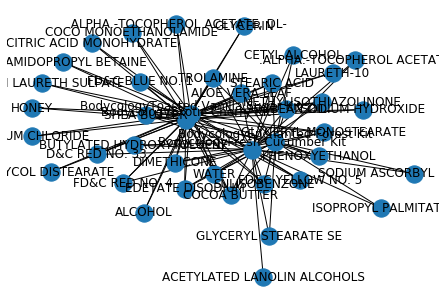

In [276]:
import networkx as nx
from bokeh.io import show, output_file
from bokeh.plotting import figure,show
from bokeh.models.graphs import from_networkx #I haven't been able to use this!
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.resources import CDN
from bokeh.embed import file_html
from math import sqrt

g.add_nodes_from(ndc,color= 'green')   
g.add_edges_from(edg,weight=0.8,color="black")
layout = nx.draw_spring(g, with_labels=True)
nx.write_graphml(g,"TEST.graphML")
network = nx.read_graphml("TEST.graphML")

#start Bokeh code
layout = nx.spring_layout(network,k=1.1/sqrt(network.number_of_nodes()),iterations=100) #pass the NX file to a spring layout

nodes, nodes_coordinates = zip(*sorted(layout.items()))
nodes_xs, nodes_ys = list(zip(*nodes_coordinates))
nodes_source = ColumnDataSource(dict(x=nodes_xs, y=nodes_ys,name=nodes)) #Can this pass the color? 


hover = HoverTool(tooltips=[("NDCName", "@ndc"), ("SubstanceName", "@substances")]) #would like to know how to add in more values here manually

plot = figure(plot_width=800, plot_height=400,tools=['tap', hover, 'box_zoom', 'reset'])

r_circles = plot.circle('x','y', source=nodes_source, size=10, color='orange', level = 'overlay') #this function sets the color of the nodes, but how to set based on the name of the node? 

lines_source = ColumnDataSource(get_edges_specs(network, layout))
def get_edges_specs(_network, _layout): 
    d = dict(xs=[], ys=[], alphas=[])
    weights = [data_f["SubstanceName"] for u, v, d in _network.edges(data=True)]
    #max_weight = max(weights)
    calc_alpha = lambda h: 0.1 + 0.6 * (h / weights)

    # example: { ..., ('user47', 'da_bjoerni', {'weight': 3}), ... }
    for u, v, data in _network.edges(data=True):
        d['xs'].append([_layout[u][0], _layout[v][0]])
        d['ys'].append([_layout[u][1], _layout[v][1]])
    return d


r_lines = plot.multi_line('x', 'y', line_width=1.5, color='black',source=lines_source)#This function sets the color of the edges

show(plot)

'\n#start Bokeh code\nlayout = nx.spring_layout(network,k=1.1/sqrt(network.number_of_nodes()),iterations=100) #pass the NX file to a spring layout\n\nnodes, nodes_coordinates = zip(*sorted(layout.items()))\nnodes_xs, nodes_ys = list(zip(*nodes_coordinates))\nnodes_source = ColumnDataSource(dict(x=nodes_xs, y=nodes_ys,name=nodes)) #Can this pass the color? \n\nhover = HoverTool(tooltips=[(\'NDCName\', \'@NDCName\'),(\'SubstanceName\',\'@SubstanceName\')]) #would like to know how to add in more values here manually\n\nplot = figure(plot_width=800, plot_height=400,tools=[\'tap\', hover, \'box_zoom\', \'reset\'])\n\nif ndc==\'BodycologyExotic Cherry Kit\n\' and \'BodycologyToasted Vanilla Sugar Kit\n\' and \'BodycologyFresh Cucumber Kit\n\'and \'BodycologyEnchanted Forest Kit\n\':\n    r_circles = plot.circle(\'x\', \'y\', source=nodes_source, size=10, color=\'orange\', level = \'overlay\')#this function sets the color of the nodes, but how to set based on the name of the node? \nelse:\n  

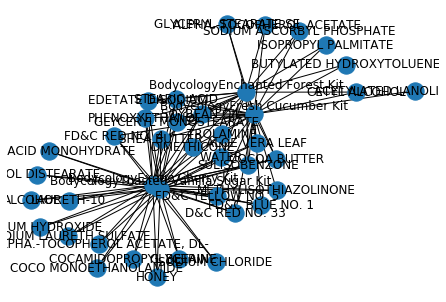

In [330]:
import networkx as nx
from bokeh.io import show, output_file
from bokeh.plotting import figure,show
from bokeh.models.graphs import from_networkx #I haven't been able to use this!
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource,GraphRenderer
from bokeh.resources import CDN
from bokeh.embed import file_html
from math import sqrt

g.add_nodes_from(ndc,color= 'orange')  
g.add_nodes_from(substances,color='blue') 
g.add_edges_from(edg,weight=0.8)
layout = nx.draw_spring(g, with_labels=True)
nx.write_graphml(g,"TEST.html")
network = nx.read_graphml("TEST.html")
'''
#start Bokeh code
layout = nx.spring_layout(network,k=1.1/sqrt(network.number_of_nodes()),iterations=100) #pass the NX file to a spring layout

nodes, nodes_coordinates = zip(*sorted(layout.items()))
nodes_xs, nodes_ys = list(zip(*nodes_coordinates))
nodes_source = ColumnDataSource(dict(x=nodes_xs, y=nodes_ys,name=nodes)) #Can this pass the color? 

hover = HoverTool(tooltips=[('NDCName', '@NDCName'),('SubstanceName','@SubstanceName')]) #would like to know how to add in more values here manually

plot = figure(plot_width=800, plot_height=400,tools=['tap', hover, 'box_zoom', 'reset'])

if ndc=='BodycologyExotic Cherry Kit\n' and 'BodycologyToasted Vanilla Sugar Kit\n' and 'BodycologyFresh Cucumber Kit\n'and 'BodycologyEnchanted Forest Kit\n':
    r_circles = plot.circle('x', 'y', source=nodes_source, size=10, color='orange', level = 'overlay')#this function sets the color of the nodes, but how to set based on the name of the node? 
else:
    r_circles = plot.circle('x', 'y', source=nodes_source, size=10, color='blue', level = 'overlay')
    
    
def get_edges_specs(_network, _layout): 
    d = dict(xs=[], ys=[], alphas=[])
    weights = [data_f["SubstanceName"] for u, v, d in _network.edges(data=True)]
    #max_weights = max(dict(weights))
    calc_alpha = lambda h: 0.1 + 0.6 * (h / weights)

    # example: { ..., ('user47', 'da_bjoerni', {'weight': 3}), ... }
    for u, v, data in _network.edges(data=True):
        d['xs'].append([_layout[u][0], _layout[v][0]])
        d['ys'].append([_layout[u][1], _layout[v][1]])
        #d['alphas'].append(calc_alpha(data_f['SubstanceName']))
    return d

lines_source = ColumnDataSource(get_edges_specs(network, layout))

r_lines = plot.multi_line('xs', 'ys', line_width=1.5,color='navy',
                      #alpha='alphas', 
                      source=lines_source)#This function sets the color of the edges

show(plot)'''

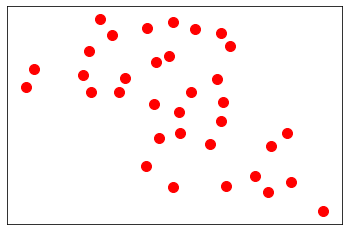